In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from pyamaze import maze, agent
from queue import PriorityQueue

In [2]:
#Transforming my database into a DataFrame
data_streets = pd.read_excel("streets.xlsx")

In [3]:
data_streets.head

<bound method NDFrame.head of    Street_Name  Rainfall_Intensity (mm)  Flood_Risk  Slope_Angle  \
0     Street_A                      150           8           10   
1     Street_B                      100           5            7   
2     Street_C                      200          10           12   
3     Street_D                      130           6            8   
4     Street_E                      180           9           12   
5     Street_F                      140           7           10   
6     Street_G                      110           4            6   
7     Street_H                      160           8           11   
8     Street_I                      120           5            7   
9     Street_J                      190          10           13   
10    Street_K                      170           9           11   
11    Street_L                      100           3            5   
12    Street_M                      200          10           14   
13    Street_N    

In [4]:
#Normalizing the range of values ​​between my columns for better research use

scaler = MinMaxScaler()
features = ['Rainfall_Intensity (mm)', 'Flood_Risk', 'Slope_Angle']
data_scaled = scaler.fit_transform(data_streets[features])
display(data_scaled)

array([[0.5       , 0.71428571, 0.55555556],
       [0.        , 0.28571429, 0.22222222],
       [1.        , 1.        , 0.77777778],
       [0.3       , 0.42857143, 0.33333333],
       [0.8       , 0.85714286, 0.77777778],
       [0.4       , 0.57142857, 0.55555556],
       [0.1       , 0.14285714, 0.11111111],
       [0.6       , 0.71428571, 0.66666667],
       [0.2       , 0.28571429, 0.22222222],
       [0.9       , 1.        , 0.88888889],
       [0.7       , 0.85714286, 0.66666667],
       [0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ],
       [0.5       , 0.42857143, 0.44444444],
       [0.05      , 0.14285714, 0.11111111],
       [0.85      , 1.        , 0.88888889],
       [0.4       , 0.42857143, 0.44444444],
       [0.75      , 0.71428571, 0.77777778],
       [0.3       , 0.28571429, 0.33333333],
       [0.95      , 0.85714286, 1.        ],
       [0.1       , 0.14285714, 0.22222222],
       [0.5       , 0.57142857, 0.55555556]])

In [5]:
# Using K-means algorithm to identify the streets that suffer most from rain in 3 different Clusters: 0,1,2

kmeans = KMeans(n_clusters=3, random_state=0)
data_streets['Cluster'] = kmeans.fit_predict(data_scaled)

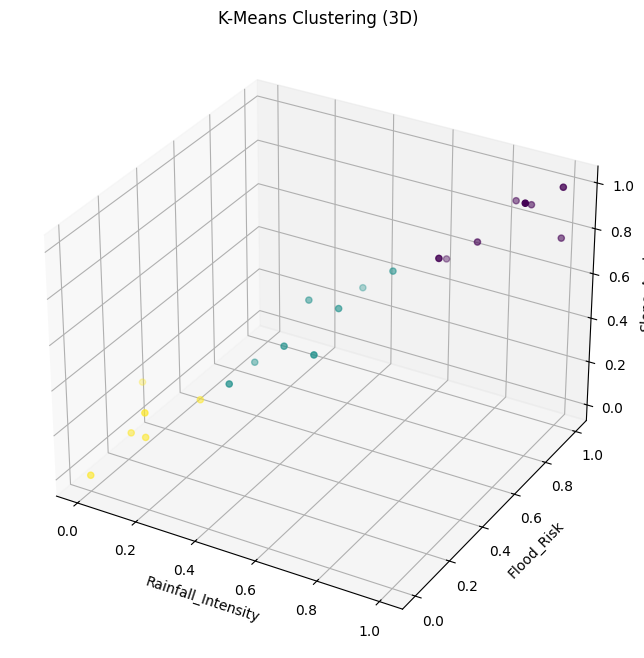

In [6]:
# Plotting on a 3D map where X would be my Rainfall_Intensity column, Y would be Flood_Risk and Z would be Slope_Angle, and now we know that the purple dots (Cluster 0) are the streets with the most risk

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=data_streets['Cluster'], cmap='viridis')
ax.set_xlabel('Rainfall_Intensity')
ax.set_ylabel('Flood_Risk')
ax.set_zlabel('Slope_Angle')
plt.title('K-Means Clustering (3D)')
plt.show()


In [7]:
#Initializing a new Database to filter only the streets with the highest risk of rain (Streets in Cluster 0)

dangerous_streets = data_streets[data_streets.Cluster == 0]
display(dangerous_streets)


,Street_Name,Rainfall_Intensity (mm),Flood_Risk,Slope_Angle,Drainage_Capacity,Infrastructure_Suitability,X_Coordinate,Y_Coordinate,Cluster
2,Street_C,200,10,12,4,9,20,30,0
4,Street_E,180,9,12,5,8,22,33,0
9,Street_J,190,10,13,4,8,30,40,0
10,Street_K,170,9,11,5,7,24,32,0
12,Street_M,200,10,14,3,9,28,38,0
15,Street_P,185,10,13,4,8,29,39,0
17,Street_R,175,8,12,5,8,26,36,0
19,Street_T,195,9,14,3,8,27,37,0


In [8]:
#Algorithm A* to find the optimal path to the endpoint


def calculate_h_score(start, end):
    row_start = start[0]
    col_start = start[1]
    row_end = end[0]
    col_end = end[1]

    return abs(row_end - row_start) + abs(col_end - col_start)

def star(maze,chosen_street):
    # My starting point would be the coordinate of the risky street chosen to find the optimal path.
    start = (int(dangerous_streets.iloc[chosen_street]["X_Coordinate"]),int(dangerous_streets.iloc[chosen_street]["Y_Coordinate"]))
    end = (1,1) # My coordinates where the water-to-energy conversion plant would be located
    f_score = {}
    g_score = {}
    g_score[start] = 0
    # Setting the f_score of all cells to infinity
    for cell in maze.grid:
        f_score[cell] = float("inf")
    f_score[start] = g_score[start] +  calculate_h_score(start,end)

    queue = PriorityQueue()

    item = (f_score[start],calculate_h_score(start,end), start)
    queue.put(item)
    path = {}

    while not queue.empty():

        current_cell = queue.get()[2]
        if current_cell == end:
            break
        #Discovering possible paths from my current cell
        for direction in "NSEW":

            if maze.maze_map[current_cell][direction] == 1:
                if direction == "N":
                    next_cell = (current_cell[0]-1, current_cell[1])
                elif direction == "S":
                    next_cell = (current_cell[0]+1, current_cell[1])
                elif direction == "E":
                    next_cell = (current_cell[0], current_cell[1]+1)
                elif direction == "W":
                    next_cell = (current_cell[0], current_cell[1]-1)
                
                # Defining next cell and its H_Score, G_Score and F_Score
                new_g_score = g_score[current_cell] +1
                new_h_score = calculate_h_score(next_cell,end)
                new_f_score = new_g_score + new_h_score
                
                # Checking if the new F_Score for this cell is lower than its current F_Score, and then adding it to my path dictionary
                if new_f_score < f_score[next_cell]:
                    g_score[next_cell] = new_g_score
                    f_score[next_cell] = new_f_score
                    new_item = (new_f_score, new_h_score, next_cell)
                    queue.put(new_item)
                    path[next_cell] = current_cell
        
    final_path = {}
    analyzed_cell = end

    # Manipulating my dictionary to find the optimal path from my starting point to my ending point
    while analyzed_cell != start:
        final_path[path[analyzed_cell]] = analyzed_cell
        analyzed_cell = path[analyzed_cell]
                    
    
    return final_path



In [9]:
# Ensuring that the user chooses an allowed street, and then displays its optimal path

index_allowed = []
for i in range(len(dangerous_streets)):
    print(f"Index {i}: {dangerous_streets.iloc[i]['Street_Name']}")
    index_allowed.append(i)


chosen_street = int(input("Type here the Index of street where you want to see your optimized path: "))
while chosen_street not in index_allowed:
    print('The index must be inside the display list!')
    chosen_street = int(input("Type here the street where you want to see your optimized path: "))

Index 0: Street_C
Index 1: Street_E
Index 2: Street_J
Index 3: Street_K
Index 4: Street_M
Index 5: Street_P
Index 6: Street_R
Index 7: Street_T


In [10]:
# Calling my function to graphically display the optimal path

maze_star = maze()
maze_star.CreateMaze(loadMaze=f"maze_{chosen_street}.csv")
agent_star = agent(maze_star,filled=True, footprints=True)
optimized_path = star(maze_star,chosen_street)
maze_star.tracePath({agent_star:optimized_path},delay=30)
maze_star.run()